## Bài tập 1

In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import random
import math

random.seed(0) # please do not remove this line
%matplotlib inline

In [2]:
def load_data_from_file(fileName = 'advertising.csv'):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]

    intercept = np.ones((features_X.shape[0], 1))
    features_X = np.concatenate((intercept, features_X), axis=1)

    return features_X, sales_Y

In [3]:
features_X, _ = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [4]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [5]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = [generate_random_value() for _ in range(n)]
    return individual

individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [6]:
features_X, sales_Y = load_data_from_file()
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)
    return fitness

features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [7]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print('individual1', individual1)
print('individual2', individual2)

individual1 [3.44, 2.57, -0.79, -2.41]
individual2 [4.09, 4.82, 3.1, 4.02]


In [10]:
def mutate(individual, mutation_rate=0.05):
    individual_new = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_new[i] = generate_random_value()

    return individual_new

before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate =2.0)
print(before_individual == after_individual)


False


In [20]:
def initialize_population(m):
    population = [create_individual() for _ in range(m)]
    return population

def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m) # duplication

        # crossover
        individual_t1, individual_t2 = crossover(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate(individual_t1)
        individual_m2 = mutate(individual_t2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())

    return new_population, compute_loss(sorted_population[m-1])

individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [21]:
def run_ga():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initialize_population(m)
    losses_list = []
    for i in range(n_generations):
        population, losses = create_new_population(population, 2, i)
        losses_list.append(losses)
    return losses_list

losses_list = run_ga()


Best loss: 74.32007006830223 with chromsome:  [4.451961254807838, 0.13120346518100345, -0.1654409943010282, -0.13322772840326458]
Best loss: 74.32007006830223 with chromsome:  [4.451961254807838, 0.13120346518100345, -0.1654409943010282, -0.13322772840326458]
Best loss: 74.32007006830223 with chromsome:  [4.451961254807838, 0.13120346518100345, -0.1654409943010282, -0.13322772840326458]
Best loss: 74.32007006830223 with chromsome:  [4.451961254807838, 0.13120346518100345, -0.1654409943010282, -0.13322772840326458]
Best loss: 65.04961316290488 with chromsome:  [-4.552115033103704, 0.05400453886839074, 0.6014920199489371, -0.1915479403096887]
Best loss: 56.04071638727552 with chromsome:  [-3.216511334816883, 0.11510177554160839, 0.37230409406354803, -0.13322772840326458]
Best loss: 56.04071638727552 with chromsome:  [-3.216511334816883, 0.11510177554160839, 0.37230409406354803, -0.13322772840326458]
Best loss: 50.02242244600224 with chromsome:  [-2.7653761244405137, 0.11510177554160839, 

Best loss: 596.9254438322097 with chromsome:  [-2.8341050786135416, -0.07692741968139294, 0.19761201659920347, 0.10330877348332823]
Best loss: 252.41681604580742 with chromsome:  [3.742396899939634, 0.17421001894963983, 0.29191915510180966, -0.5909327327227654]
Best loss: 252.41681604580742 with chromsome:  [3.742396899939634, 0.17421001894963983, 0.29191915510180966, -0.5909327327227654]
Best loss: 252.41681604580742 with chromsome:  [3.742396899939634, 0.17421001894963983, 0.29191915510180966, -0.5909327327227654]
Best loss: 236.2515727658435 with chromsome:  [3.742396899939634, 0.17421001894963983, 0.29191915510180966, -0.4557459703164446]
Best loss: 236.2515727658435 with chromsome:  [3.742396899939634, 0.17421001894963983, 0.29191915510180966, -0.4557459703164446]
Best loss: 236.2515727658435 with chromsome:  [3.742396899939634, 0.17421001894963983, 0.29191915510180966, -0.4557459703164446]
Best loss: 27.208820876817537 with chromsome:  [-2.8341050786135416, 0.04308869610617605, 0

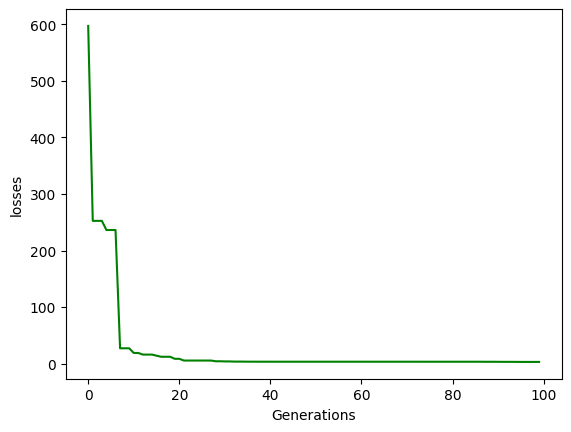

In [22]:
def visualize_loss(losses_list):
    plt.plot(losses_list, c='green')
    plt.xlabel('Generations')
    plt.ylabel('losses')
    plt.show()

losses_list = run_ga()
visualize_loss(losses_list)

In [24]:
def visualize_predict_gt():
    global population
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_price = sum(c*x for x, c in zip(feature, theta))
        estimated_prices.append(estimated_price)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

visualize_predict_gt()

NameError: name 'population' is not defined